In [216]:
import pandas as pd
import numpy as np
import seaborn as sns

## DATA CLEANING

### Cab Data


In [2]:
CabData=pd.read_csv('/home/miano/Documents/DataGlacier/week2/DataSets/Cab_Data.csv')
CabData.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [3]:
CabData.shape

(359392, 7)

In [4]:
CabData.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [5]:
CabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
Transaction ID    359392 non-null int64
Date of Travel    359392 non-null int64
Company           359392 non-null object
City              359392 non-null object
KM Travelled      359392 non-null float64
Price Charged     359392 non-null float64
Cost of Trip      359392 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
CabData.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

There are no missing values in the dataset. The dataset has 7 columns and 359392 rows. However, the dataset has some changes to be made:

1. Data type:

    a) Transaction ID is not supposed to be an integer, should be float type
    
    b) Date of Travel is supposed to be a date, not integer values

In [7]:
#Convert transactions ID to float type
CabData['Transaction ID']=CabData['Transaction ID'].astype(object)
CabData['Transaction ID'].dtype

dtype('O')

In [8]:
#Check for any duplicated values
CabData['Transaction ID'].duplicated().sum()

#There are no duplicated transactions

0

#### Categorical Data

In [9]:
CabData['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [10]:
CabData['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [11]:
CabData['City'].value_counts().count()

19

There are 2 companies: Yellow cab and pink cab. 
The two companies operate in 19 cities

#### Numerical Data

### City Data

In [12]:
#Load dataset
city=pd.read_csv('/home/miano/Documents/DataGlacier/week2/DataSets/City.csv')
city.head(20)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [13]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [14]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 560.0+ bytes


There are 20 cities, each given its population and users. There are no null values. However, columns population and users are of object data type instead of integer.

In [15]:
#Convert population and users to the correct data type
city['Population']=city['Population'].str.replace(',','')
city['Population'].astype(int)

city['Users']=city['Users'].str.replace(',','')
city['Users'].astype(int)


0     302149
1     164468
2     144132
3      17675
4      27247
5      12994
6      69995
7       6133
8      22157
9      24701
10     12421
11     14978
12     25063
13      5712
14    213609
15      7044
16      3643
17    127001
18      9270
19     80021
Name: Users, dtype: int64

In [16]:

city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null object
Users         20 non-null object
dtypes: object(3)
memory usage: 560.0+ bytes


### Customer Data

In [17]:
customer=pd.read_csv(r'/home/miano/Documents/DataGlacier/week2/DataSets/Customer_ID.csv')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [18]:
customer.shape

(49171, 4)

In [19]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
Customer ID           49171 non-null int64
Gender                49171 non-null object
Age                   49171 non-null int64
Income (USD/Month)    49171 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
customer['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

In [21]:
# Convert Customer ID into object data type
customer['Customer ID']=customer['Customer ID'].astype(object)

In [22]:
customer.describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


### Transactions Data

In [23]:
transactions=pd.read_csv(r'/home/miano/Documents/DataGlacier/week2/DataSets/Transaction_ID.csv')
transactions.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
Transaction ID    440098 non-null int64
Customer ID       440098 non-null int64
Payment_Mode      440098 non-null object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [25]:
# Convert transactions ID and Customer ID into object type
transactions['Customer ID']=transactions['Customer ID'].astype(object)
transactions['Transaction ID']=transactions['Transaction ID'].astype(object)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
Transaction ID    440098 non-null object
Customer ID       440098 non-null object
Payment_Mode      440098 non-null object
dtypes: object(3)
memory usage: 10.1+ MB


In [26]:
transactions['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [27]:
transactions.shape

(440098, 3)

Transactions Dataset is fairly cleaned, no missing values. 440098 entries of different transaction IDs, payment modes and customers ID. Only required conversion of Transaction ID and Customer ID into object data types, not integers.

In [28]:
#Check for any duplicated values
transactions['Transaction ID'].duplicated().sum()

0

In [29]:
transactions['Customer ID'].duplicated().sum()

390927

In [30]:
transactions['Customer ID'].value_counts()

494      54
2939     53
2766     51
1070     51
1803     50
2539     50
944      50
903      50
1067     50
1628     50
858      50
126      50
2577     49
1103     49
2895     49
442      49
1360     49
1673     48
2776     48
1452     48
2912     48
336      48
205      48
1532     47
972      47
960      47
696      47
1769     47
1546     47
42879    47
         ..
10243     1
29907     1
10240     1
29909     1
29867     1
10283     1
29866     1
10285     1
10323     1
29801     1
10321     1
29807     1
29808     1
29809     1
10314     1
29816     1
29819     1
29830     1
10303     1
29842     1
29847     1
10300     1
10297     1
29852     1
29855     1
10291     1
10288     1
10287     1
29865     1
47442     1
Name: Customer ID, Length: 49171, dtype: int64

Transaction IDs are not duplicated, hence accurate. But customer IDs are duplicated as one customer can have several transactions

From the three datasets, we can find relations between datasets

a) Link transactions dataset with cab dataset using the transaction ID column

b) Link transactions dataset with customer dataset using the customer ID column

c) Link the cab dataset with city dataset using the city column

Hence, all datasets can be linked to form one large dataset, making data analysis easier.

In [31]:
#Link b) 
customerTransactions=pd.merge(transactions,customer)
customerTransactions.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [32]:
#Link a) and b)
data=pd.merge(customerTransactions,CabData)
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192


In [33]:
#Link c)
#Merge city data with main dataset



data=pd.merge(data,city,on='City')
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701


Now we have one large dataset named "Data" which has combined all info from other datasets. This dataset will be used going forward. But first, we have to convert the date column into an appropriate data type. This is impossible hence we can drop this column.

In [34]:
data['Date of Travel']=data['Date of Travel'].astype(object)
#*****
#data['Date of Travel']=pd.to_datetime(data['Date of Travel'],format='%Y%m%d')

# EXPLORATORY DATA ANALYSIS

In [35]:
#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701


## Univariate Data Analysis: Categorical Variables

### 1. Gender

Frequency Distribution: 
 Male      205912
Female    153480
Name: Gender, dtype: int64
Percentage Distribution
 Male      0.572945
Female    0.427055
Name: Gender, dtype: float64


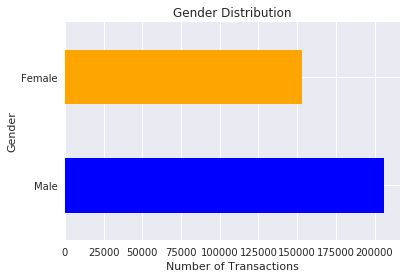

In [36]:
# Frequency Distribution
print('Frequency Distribution: ' "\n",data['Gender'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", data['Gender'].value_counts(normalize=True))

# Graph
sns.set()
data['Gender'].value_counts().plot.barh(color=['blue','orange'])
plt.xlabel('Number of Transactions')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

Frequency Distribution: 
 Male      26562
Female    22609
Name: Gender, dtype: int64
Percentage Distribution
 Male      0.540196
Female    0.459804
Name: Gender, dtype: float64


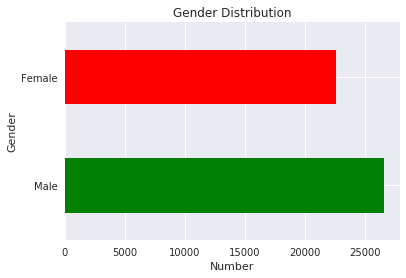

In [37]:
# Frequency Distribution
print('Frequency Distribution: ' "\n",customer['Gender'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", customer['Gender'].value_counts(normalize=True))

# Graph
sns.set()
customer['Gender'].value_counts().plot.barh(color=['green','red'])
plt.xlabel('Number')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

According to the customer database, there are more males (54%) than females (46%). In the same trend, males make more transactions compared to females, but at a higher rate. 

### 2. Company

Frequency Distribution: 
 Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
Percentage Distribution
 Yellow Cab    0.764294
Pink Cab      0.235706
Name: Company, dtype: float64


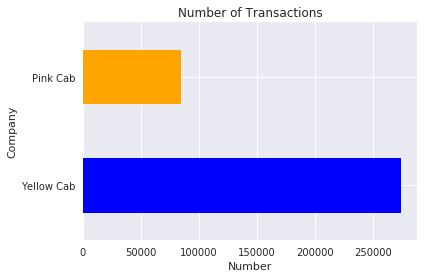

In [38]:
# Frequency Distribution
print('Frequency Distribution: ' "\n",data['Company'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", data['Company'].value_counts(normalize=True))

# Graph
sns.set()
data['Company'].value_counts().plot.barh(color=['blue','orange'])
plt.xlabel('Number')
plt.ylabel('Company')
plt.title('Number of Transactions')
plt.show()

Yellow Cab makes more transactions than the Pink Cab. We have to analyse the companies separately to see their differences

### 3. Payment Mode

### 4. City

## Univariate Data Analysis: Numerical Variables

## Bivariate Data Analysis

In [39]:
#City Distribution per Company



### Analysing the companies separately

We have to split the data into two, for each of the companies: yellow cab and pink cab. Then we will do an analysis of their market and volume of business

In [40]:
# Split into pink cab and yellow cab
pink= data[data['Company']=='Pink Cab']
yellow=data[data['Company']=='Yellow Cab']

In [41]:
pink.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,814885,24701
3,10000012,27703,Card,Male,27,9237,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,814885,24701
6,10395626,27703,Card,Male,27,9237,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.934,814885,24701
7,10000013,28712,Cash,Male,53,11242,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,814885,24701
11,10000014,28020,Cash,Male,23,23327,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,814885,24701


In [42]:
yellow.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
1,10351127,29290,Cash,Male,28,10813,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701
2,10412921,29290,Card,Male,28,10813,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701
4,10320494,27703,Card,Male,27,9237,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701
5,10324737,27703,Cash,Male,27,9237,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,814885,24701
8,10079404,28712,Card,Male,53,11242,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,814885,24701


In [43]:
# Drop the Company column in pink and yellow dataset as it is no longer significant


## Company A: Pink Cab

In [44]:
pink.describe()

,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,35.322414,15059.047137,22.559917,310.800856,248.148682
std,12.644780,7991.077762,12.231092,181.995661,135.403345
min,18.000000,2000.000000,1.900000,15.600000,19.000000
25%,25.000000,8371.000000,12.000000,159.970000,131.868000
50%,33.000000,14713.000000,22.440000,298.060000,246.330000
75%,42.000000,21055.000000,32.960000,441.505000,360.180000
max,65.000000,35000.000000,48.000000,1623.480000,576.000000


In [45]:
pink.shape

(84711, 14)

In [46]:
pink.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84711 entries, 0 to 359363
Data columns (total 14 columns):
Transaction ID        84711 non-null object
Customer ID           84711 non-null object
Payment_Mode          84711 non-null object
Gender                84711 non-null object
Age                   84711 non-null int64
Income (USD/Month)    84711 non-null int64
Date of Travel        84711 non-null object
Company               84711 non-null object
City                  84711 non-null object
KM Travelled          84711 non-null float64
Price Charged         84711 non-null float64
Cost of Trip          84711 non-null float64
Population            84711 non-null object
Users                 84711 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 9.7+ MB


In [47]:
pink.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

The pink dataset has 84711 values with 13 rows. There are no null values.We now proceed to data analysis.  

Frequency Distribution: 
 Male      47231
Female    37480
Name: Gender, dtype: int64
Percentage Distribution
 Male      0.557555
Female    0.442445
Name: Gender, dtype: float64


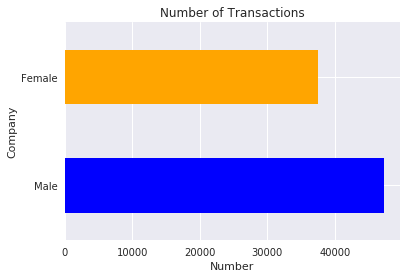

In [48]:
# Gender Distribution

# Frequency Distribution
print('Frequency Distribution: ' "\n",pink['Gender'].value_counts())

#Percentage Distribution
print('Percentage Distribution' "\n", pink['Gender'].value_counts(normalize=True))

# Graph
sns.set()
pink['Gender'].value_counts().plot.barh(color=['blue','orange'])
plt.xlabel('Number')
plt.ylabel('Company')
plt.title('Number of Transactions')
plt.show()

LOS ANGELES CA    19865
NEW YORK NY       13967
SAN DIEGO CA      10672
CHICAGO IL         9361
BOSTON MA          5186
SILICON VALLEY     3797
WASHINGTON DC      3692
SEATTLE WA         2732
MIAMI FL           2002
AUSTIN TX          1868
NASHVILLE TN       1841
ATLANTA GA         1762
ORANGE COUNTY      1513
DENVER CO          1394
DALLAS TX          1380
SACRAMENTO CA      1334
PHOENIX AZ          864
TUCSON AZ           799
PITTSBURGH PA       682
Name: City, dtype: int64


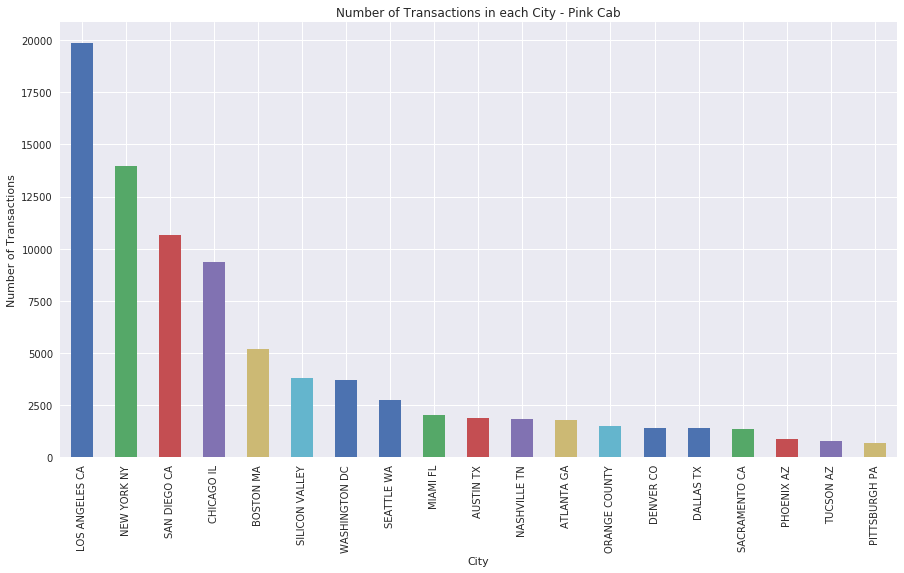

In [49]:
# City Distribution 
print(pink['City'].value_counts())

# Graph
sns.set(rc = {'figure.figsize':(15,8)})
pink['City'].value_counts().plot.bar()
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions in each City - Pink Cab')
plt.show()

NEW YORK NY       85918
CHICAGO IL        47264
WASHINGTON DC     40045
LOS ANGELES CA    28168
BOSTON MA         24506
SAN DIEGO CA       9816
ATLANTA GA         5795
DALLAS TX          5637
SEATTLE WA         5265
SILICON VALLEY     4722
MIAMI FL           4452
AUSTIN TX          3028
ORANGE COUNTY      2469
DENVER CO          2431
PHOENIX AZ         1200
NASHVILLE TN       1169
TUCSON AZ          1132
SACRAMENTO CA      1033
PITTSBURGH PA       631
Name: City, dtype: int64


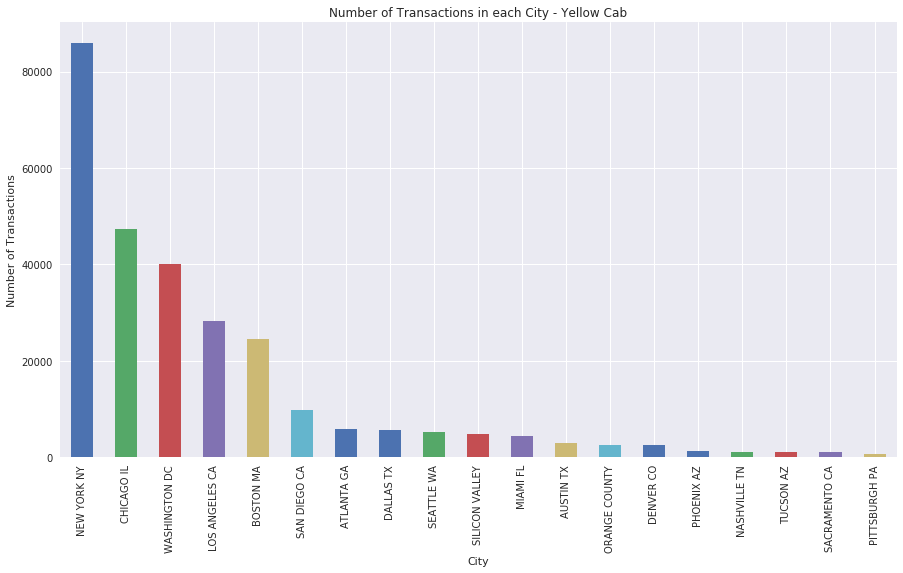

In [50]:
# City Distribution 
print(yellow['City'].value_counts())

# Graph
sns.set(rc = {'figure.figsize':(15,8)})
yellow['City'].value_counts().plot.bar()
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions in each City - Yellow Cab')
plt.show()

              City  Transactions Pink  Transactions Yellow
0   LOS ANGELES CA              19865                28168
1      NEW YORK NY              13967                85918
2     SAN DIEGO CA              10672                 9816
3       CHICAGO IL               9361                47264
4        BOSTON MA               5186                24506
5   SILICON VALLEY               3797                 4722
6    WASHINGTON DC               3692                40045
7       SEATTLE WA               2732                 5265
8         MIAMI FL               2002                 4452
9        AUSTIN TX               1868                 3028
10    NASHVILLE TN               1841                 1169
11      ATLANTA GA               1762                 5795
12   ORANGE COUNTY               1513                 2469
13       DENVER CO               1394                 2431
14       DALLAS TX               1380                 5637
15   SACRAMENTO CA               1334                 10

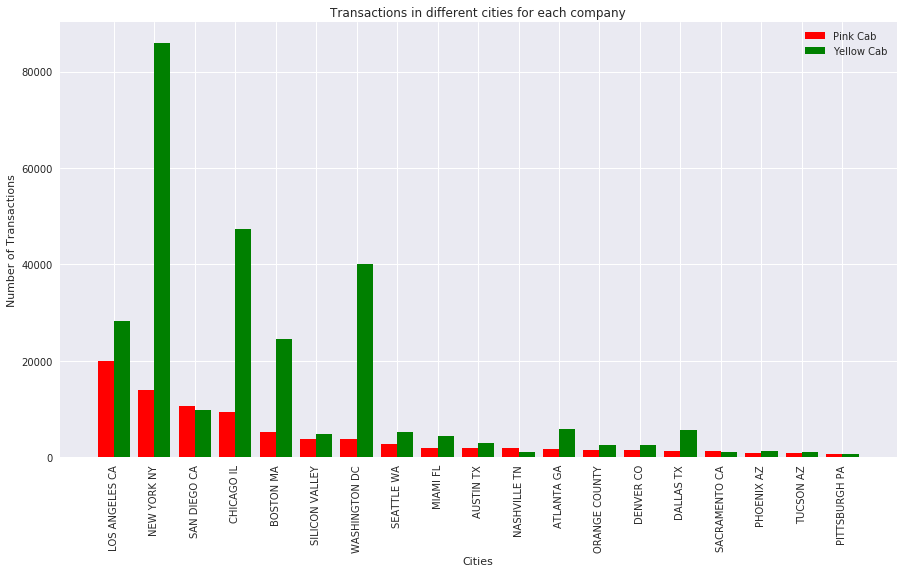

In [130]:
# Putting the two graphs together to observe different number of transactions in different cities by the two companies.
PinkCities=pd.DataFrame(pink['City'].value_counts())
PinkCities.reset_index(inplace=True)
PinkCities=PinkCities.rename(columns={'index':'City','City':'Transactions Pink'})
YellowCities=pd.DataFrame(yellow['City'].value_counts())
YellowCities.reset_index(inplace=True)
YellowCities=YellowCities.rename(columns={'index':'City','City':'Transactions Yellow'})

TransactionsCities=pd.merge(PinkCities,YellowCities,on='City')
print(TransactionsCities)


x=np.arange(19)
y1=TransactionsCities['Transactions Pink']
y2=TransactionsCities['Transactions Yellow']
width=0.4

plt.bar(x-0.2,y1,width,label="Pink Cab",color="red")
plt.bar(x+0.2,y2,width,label="Yellow Cab",color="green")
plt.xlabel("Cities")
plt.ylabel("Number of Transactions")
plt.title("Transactions in different cities for each company")
plt.xticks(x,TransactionsCities['City'],rotation=90)
plt.legend()
plt.show()

From the above graph, however much yellow cab has more business, pink cab has a higher business in some cities such as San Diego, Nashville, Sacramento and Pittsburgh. Let's now graph all this as a percentage of transactions.

              City  Transactions Pink Per  Transactions Yellow Per
0   LOS ANGELES CA               0.234503                 0.102548
1      NEW YORK NY               0.164878                 0.312792
2     SAN DIEGO CA               0.125981                 0.035736
3       CHICAGO IL               0.110505                 0.172069
4        BOSTON MA               0.061220                 0.089216
5   SILICON VALLEY               0.044823                 0.017191
6    WASHINGTON DC               0.043583                 0.145787
7       SEATTLE WA               0.032251                 0.019168
8         MIAMI FL               0.023633                 0.016208
9        AUSTIN TX               0.022051                 0.011024
10    NASHVILLE TN               0.021733                 0.004256
11      ATLANTA GA               0.020800                 0.021097
12   ORANGE COUNTY               0.017861                 0.008989
13       DENVER CO               0.016456                 0.00

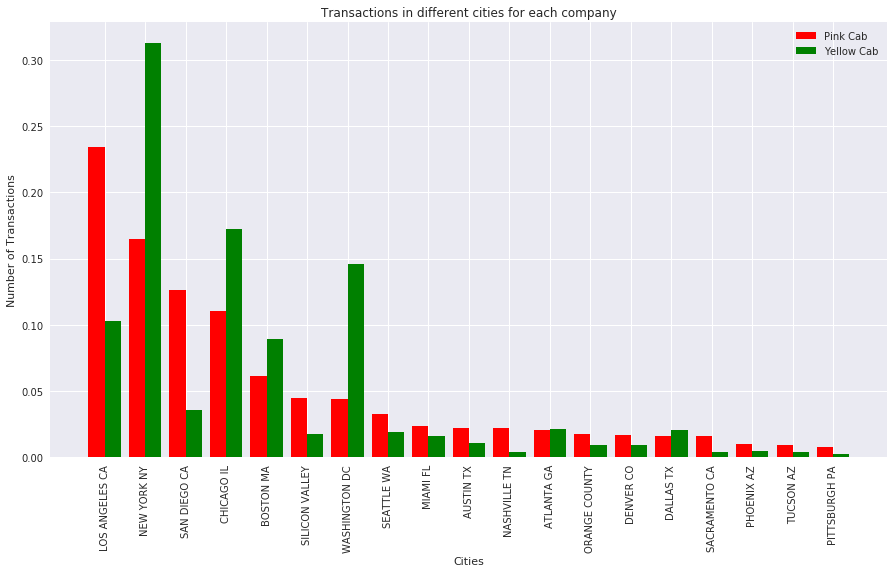

In [135]:
PinkCitiesPer=pd.DataFrame(pink['City'].value_counts(normalize=True))
PinkCitiesPer.reset_index(inplace=True)
PinkCitiesPer=PinkCitiesPer.rename(columns={'index':'City','City':'Transactions Pink Per'})
YellowCitiesPer=pd.DataFrame(yellow['City'].value_counts(normalize=True))
YellowCitiesPer.reset_index(inplace=True)
YellowCitiesPer=YellowCitiesPer.rename(columns={'index':'City','City':'Transactions Yellow Per'})

TransactionsCitiesPer=pd.merge(PinkCitiesPer,YellowCitiesPer,on='City')
print(TransactionsCitiesPer)
print(TransactionsCitiesPer['Transactions Pink Per'].describe())
print(TransactionsCitiesPer['Transactions Yellow Per'].describe())
x=np.arange(19)
y1=TransactionsCitiesPer['Transactions Pink Per']
y2=TransactionsCitiesPer['Transactions Yellow Per']
width=0.4

plt.bar(x-0.2,y1,width,label="Pink Cab",color="red")
plt.bar(x+0.2,y2,width,label="Yellow Cab",color="green")
plt.xlabel("Cities")
plt.ylabel("Number of Transactions")
plt.title("Transactions in different cities for each company")
plt.xticks(x,TransactionsCitiesPer['City'],rotation=90)
plt.legend()
plt.show()



From the above graph, highest percentage of business of pink cab is from Los Angeles, which is higher than for yellow cab. The same trend is observed for 12 other cities. Yellow cab is in mainly New York, Chicago and Washington. Other cities from a proportion of less than 10% each. The pink cab business has well distributed its business across most cities, with little deviations in percentages.50% of transactions are less than 1.72% for yellow cab and 2.2% for pink cab.  

(0.173, 0.256]        0
(0.0897, 0.173]       1
(0.256, 0.339]        3
(0.00516, 0.0897]    16
Name: Rate of Usage, dtype: int64
count    20.000000
mean      0.074440
std       0.109301
min       0.006497
25%       0.013126
50%       0.025914
75%       0.075753
max       0.339282
Name: Rate of Usage, dtype: float64


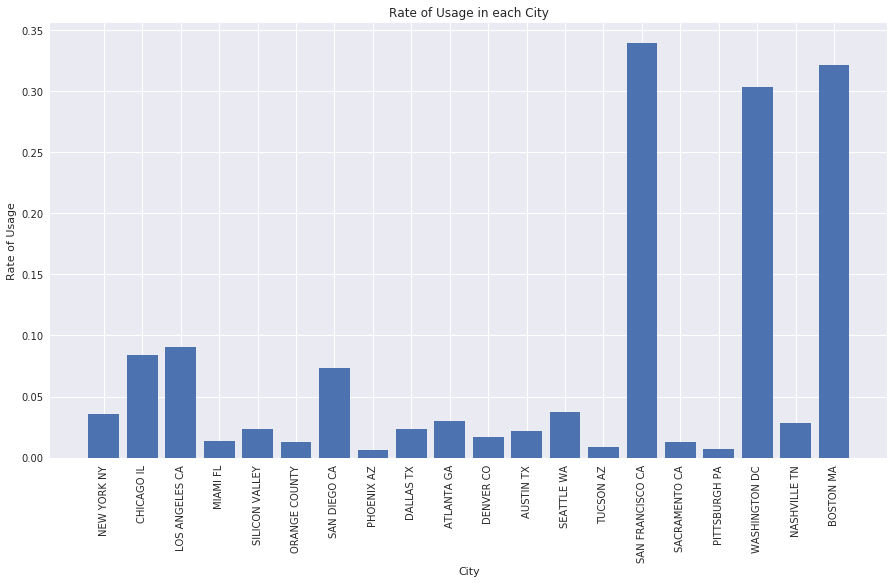

In [52]:
# Comparing population of different cities with the number of users.
city['Rate of Usage']=city['Users'].str.replace(',','').astype(int)/city['Population'].str.replace(',','').astype(int)

print(city['Rate of Usage'].value_counts(bins=4,ascending=True))
print(city['Rate of Usage'].describe())

plt.bar(city['City'],city['Rate of Usage'])
plt.xlabel('City')
plt.ylabel('Rate of Usage')
plt.title('Rate of Usage in each City')
plt.xticks(rotation=90)
plt.show()

From the data analysis above, we obtain the following observations: 
1. The maximum rate of usage: 33.93% and minimum rate of usage: 0.6497%
2. Only 3 cities have a rate of usage greater than 25%
3. 75% of the cities have a rate of usage less than 7.6%
4. No city has a rate of usage between 17.3% and 35%
5. Mean rate of usage is 7.444%

All this observations imply that there is little uptake of the cab business by all cities, and despite LA having the largest number of transactions, it still serves a very small percentage of the city. This implies that efforts should be made towards uptake of the cab business by both companies through advertising, marketing through promotions, discounts.

In [53]:
# Customer Distribution

print("Maximum transactions by a customer: " , pink['Customer ID'].value_counts().max())
print("Minimum transactions by a customer: " , pink['Customer ID'].value_counts().min())

# New dataframe to capture number of transactions of different customers
counts=pd.DataFrame(pink['Customer ID'].value_counts())
counts.reset_index(inplace=True)
counts = counts.rename(columns = {'index':'Customer ID','Customer ID':'Transactions'})
counts.head()
print(counts['Transactions'].value_counts())
print(counts['Transactions'].value_counts(normalize=True))

counts['Transactions'].describe()



Maximum transactions by a customer:  18
Minimum transactions by a customer:  1
1     14334
2      6448
3      3586
4      2447
5      1825
6      1299
7       921
8       610
9       368
10      252
11      127
12       63
13       22
14       14
15        7
17        3
16        3
18        1
Name: Transactions, dtype: int64
1     0.443365
2     0.199443
3     0.110919
4     0.075688
5     0.056449
6     0.040179
7     0.028487
8     0.018868
9     0.011383
10    0.007795
11    0.003928
12    0.001949
13    0.000680
14    0.000433
15    0.000217
17    0.000093
16    0.000093
18    0.000031
Name: Transactions, dtype: float64


count    32330.000000
mean         2.620198
std          2.193812
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: Transactions, dtype: float64

There are only 240 unique customers with over 10 transactions, out of the 32330 unique customers. The data is positively skewed, lowering the mean number of transactions to 2.62, which is equivalent to 3. This may suggest that the company is doing a poor job at customer retention. 44.33% of the customers have only used the app once, which is almost half of the unique customers registered with the app. About 75% have less than 4 transactions. 

In [54]:
# Payment Modes
print('Payment Modes of Pink Cab: ' "\n" ,pink['Payment_Mode'].value_counts(normalize=True))
print('Payment Modes of Yellow Cab:' "\n", yellow['Payment_Mode'].value_counts(normalize=True))
print('Payment Modes of Both Companies:' "\n", data['Payment_Mode'].value_counts(normalize=True))

Payment Modes of Pink Cab: 
 Card    0.59873
Cash    0.40127
Name: Payment_Mode, dtype: float64
Payment Modes of Yellow Cab:
 Card    0.599914
Cash    0.400086
Name: Payment_Mode, dtype: float64
Payment Modes of Both Companies:
 Card    0.599635
Cash    0.400365
Name: Payment_Mode, dtype: float64


60% of customers pay using card, while the rest using cash. This proportion is similar in both companies. 

In [55]:
data.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date of Travel', 'Company', 'City',
       'KM Travelled', 'Price Charged', 'Cost of Trip', 'Population', 'Users'],
      dtype='object')

count    359392.000000
mean         35.336705
std          12.594234
min          18.000000
25%          25.000000
50%          33.000000
75%          42.000000
max          65.000000
Name: Age, dtype: float64


Text(0.5,1,'Age Distribution on a Histogram of both companies')

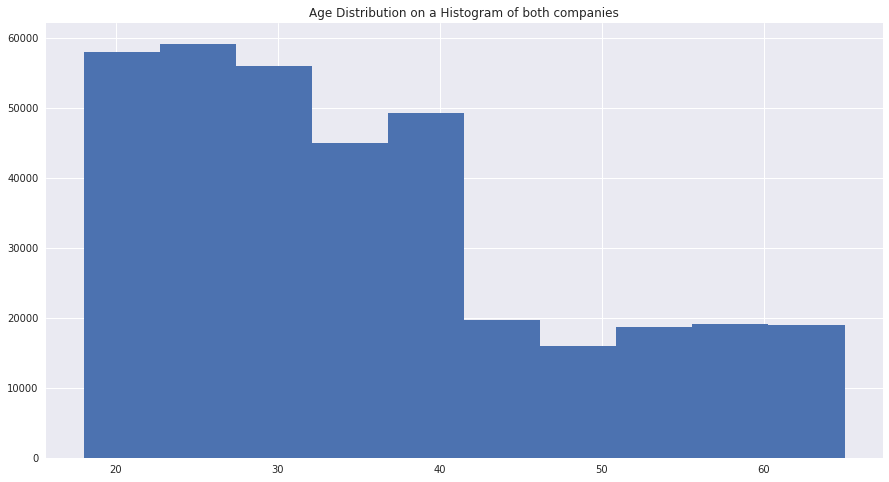

In [56]:
# Age Distribution
print(data['Age'].describe())
plt.hist(data['Age'],bins=10)
plt.title('Age Distribution on a Histogram of both companies')


/home/miano/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


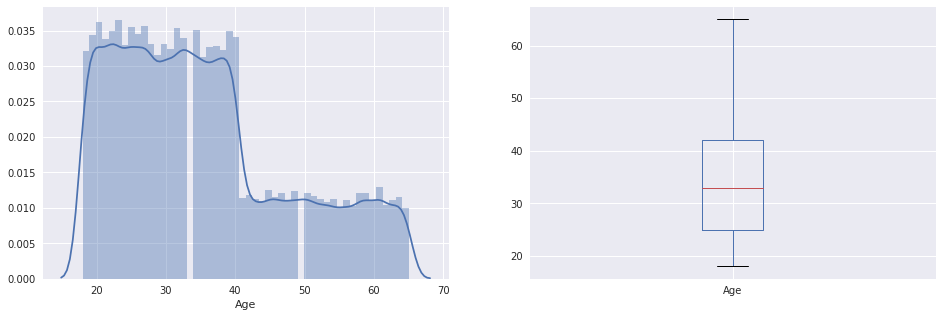

In [57]:
#Box plot
# Visualizing Age distribution from the data from both companies
# plt.figure(1)
plt.subplot(121)
sns.distplot(data['Age']);

plt.subplot(122)
data['Age'].plot.box(figsize=(16,5))

plt.show()

From the above diagrams, we can established that 75% of the transactions are from customers who are between 18 and 42 years of age. People above this age but below 66 use the service rarely which makes sense in the real world. Let's further analyse these insights on the customer data.

In [58]:
# Age distribution of customers
# Create new column with number of transactions of different customers
number_transactions=pd.DataFrame(data['Customer ID'].value_counts())

number_transactions.reset_index(inplace=True)
number_transactions = number_transactions.rename(columns = {'index':'Customer ID','Customer ID':'Number of Transactions'})
number_transactions['Customer ID']=number_transactions['Customer ID'].astype(object)
number_transactions.head()

# Merge with customer data
customer=pd.merge(customer,number_transactions,on='Customer ID')
print(customer.shape)
print(number_transactions.info())
customer.head()

(46148, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46148 entries, 0 to 46147
Data columns (total 2 columns):
Customer ID               46148 non-null object
Number of Transactions    46148 non-null int64
dtypes: int64(1), object(1)
memory usage: 721.1+ KB
None


,Customer ID,Gender,Age,Income (USD/Month),Number of Transactions
0,29290,Male,28,10813,3
1,27703,Male,27,9237,4
2,28712,Male,53,11242,4
3,28020,Male,23,23327,4
4,27182,Male,33,8536,4


In [59]:
# Add two columns on the customer data with number of transactions from pink cab and yellow cab

#Pink Cab
number_transactionsPink=pd.DataFrame(pink['Customer ID'].value_counts())

number_transactionsPink.reset_index(inplace=True)
number_transactionsPink = number_transactionsPink.rename(columns = {'index':'Customer ID','Customer ID':'Number of Transactions_Pink'})
number_transactionsPink['Customer ID']=number_transactionsPink['Customer ID'].astype(object)
number_transactionsPink.head()

# Merge with customer data
customer=pd.merge(customer,number_transactionsPink,on='Customer ID')

#Yellow Cab
number_transactionsYellow=pd.DataFrame(yellow['Customer ID'].value_counts())

number_transactionsYellow.reset_index(inplace=True)
number_transactionsYellow = number_transactionsYellow.rename(columns = {'index':'Customer ID','Customer ID':'Number of Transactions_Yellow'})
number_transactionsYellow['Customer ID']=number_transactionsYellow['Customer ID'].astype(object)
number_transactionsYellow.head()

# Merge with customer data
customer=pd.merge(customer,number_transactionsYellow,on='Customer ID')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month),Number of Transactions,Number of Transactions_Pink,Number of Transactions_Yellow
0,29290,Male,28,10813,3,1,2
1,27703,Male,27,9237,4,2,2
2,28712,Male,53,11242,4,1,3
3,28020,Male,23,23327,4,3,1
4,27182,Male,33,8536,4,1,3


In [81]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26078 entries, 0 to 26077
Data columns (total 7 columns):
Customer ID                      26078 non-null object
Gender                           26078 non-null object
Age                              26078 non-null int64
Income (USD/Month)               26078 non-null int64
Number of Transactions           26078 non-null int64
Number of Transactions_Pink      26078 non-null int64
Number of Transactions_Yellow    26078 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


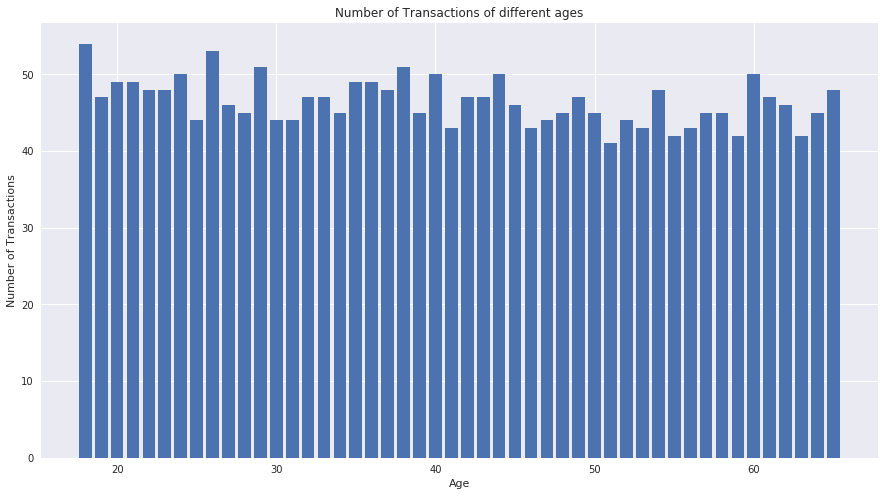

In [68]:

plt.bar(customer['Age'],customer['Number of Transactions'])
plt.title("Number of Transactions of different ages")
plt.ylabel("Number of Transactions")
plt.xlabel("Age")
plt.show()


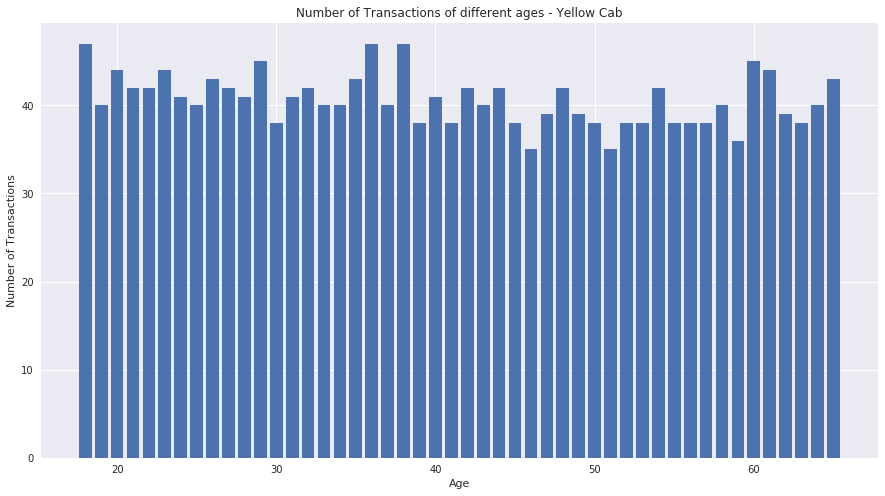

count    26078.000000
mean         8.981824
std          9.049839
min          1.000000
25%          2.000000
50%          5.000000
75%         13.000000
max         47.000000
Name: Number of Transactions_Yellow, dtype: float64

In [69]:
plt.bar(customer['Age'],customer['Number of Transactions_Yellow'])
plt.title("Number of Transactions of different ages - Yellow Cab")
plt.ylabel("Number of Transactions")
plt.xlabel("Age")
plt.show()
customer['Number of Transactions_Yellow'].describe()

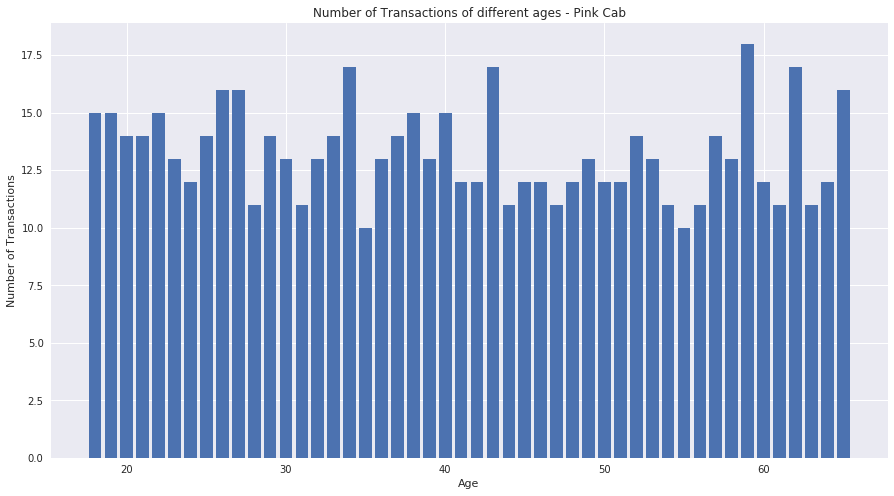

count    26078.000000
mean         2.925454
std          2.315684
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         18.000000
Name: Number of Transactions_Pink, dtype: float64

In [70]:
plt.bar(customer['Age'],customer['Number of Transactions_Pink'])
plt.title("Number of Transactions of different ages - Pink Cab")
plt.ylabel("Number of Transactions")
plt.xlabel("Age")
plt.show()
customer['Number of Transactions_Pink'].describe()

/home/miano/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


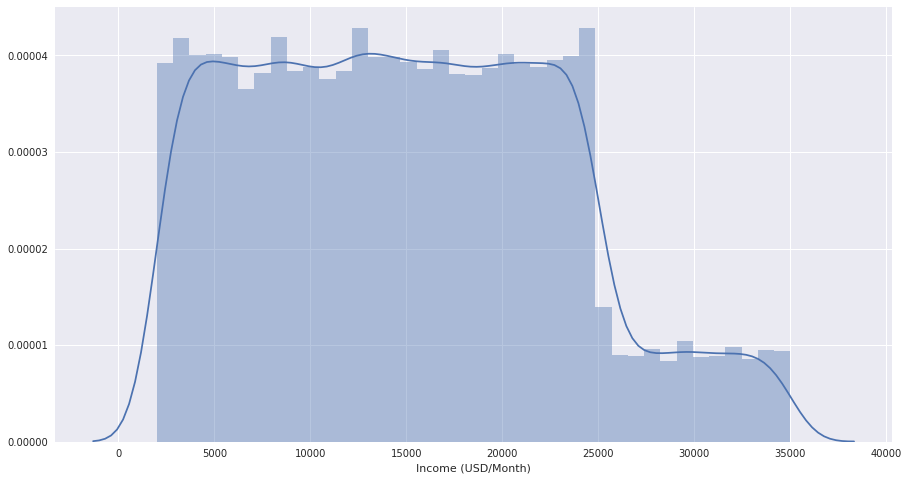

count    26078.000000
mean     15021.416788
std       7991.821558
min       2000.000000
25%       8311.250000
50%      14650.000000
75%      21045.000000
max      34996.000000
Name: Income (USD/Month), dtype: float64

In [142]:
#Income

sns.distplot(customer['Income (USD/Month)'])
plt.show()
customer['Income (USD/Month)'].describe()

75% of the customer earn between USD 2,000 and USD 21,045 per month. The data is positively skewed as only 25% customers earn greater than USD 21045, with the highest earner at USD 34996 p.m.

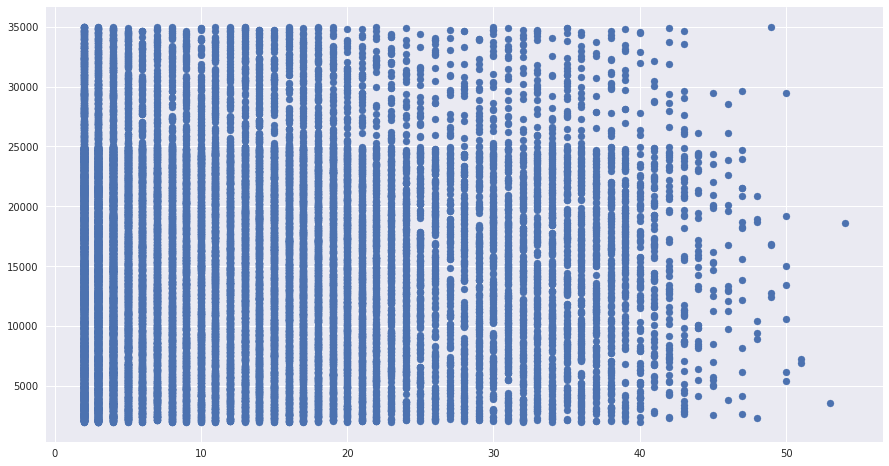

In [150]:
plt.scatter(customer['Number of Transactions'],customer['Income (USD/Month)'])
plt.show()


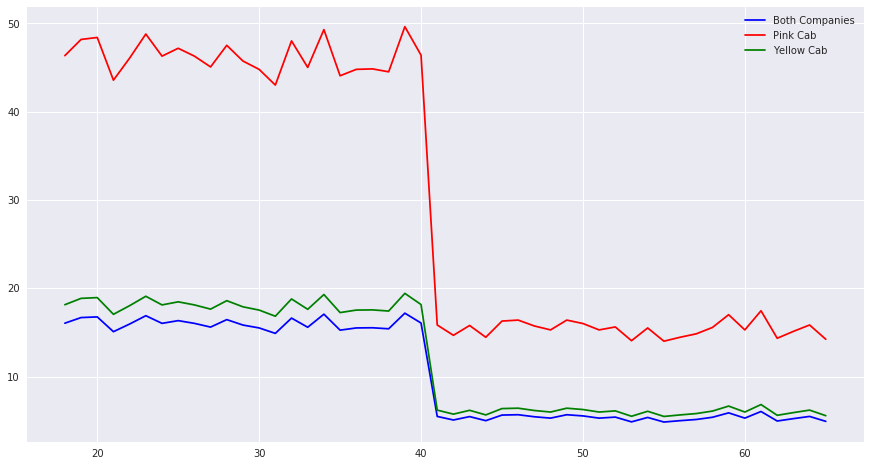

In [94]:
# Average Transactions at each Age for both companies, and each company individually
customer['Age'].value_counts()
AgeVsTransactions=pd.crosstab(customer['Age'],customer['Number of Transactions'])
AgeVsTransactions['mean']=AgeVsTransactions.mean(axis=1)

AgeVsTransactionsPink=pd.crosstab(customer['Age'],customer['Number of Transactions_Pink'])
AgeVsTransactions['mean_pink']=AgeVsTransactionsPink.mean(axis=1)

AgeVsTransactionsYellow=pd.crosstab(customer['Age'],customer['Number of Transactions_Yellow'])
AgeVsTransactions['mean_yellow']=AgeVsTransactionsYellow.mean(axis=1)
AgeVsTransactions.reset_index(inplace=True)

#Graph
labels=['Both companies','Pink Cab','Yellow Cab']
x=AgeVsTransactions['Age']
y1=AgeVsTransactions['mean']
y2=AgeVsTransactions['mean_pink']
y3=AgeVsTransactions['mean_yellow']


plt.plot(x,y1,label="Both Companies",color="blue")
plt.plot(x,y2,label="Pink Cab",color="red")
plt.plot(x,y3,label="Yellow Cab",color="green")
plt.legend()
plt.show()

There is a big drop from age 40 to age 42. This is weird since the transition should be more of a smooth curve with decreasing transactions with an increase in age. Logically, this decrease is explained by increase in car ownership with better pay, or due to family needs. Also, reduced use of technology at older ages contributes to the decrease. However, the question remains, why the steep decrease?

In [93]:
# Dates of Travel

In [153]:
# Prices Charged
print("Price Charges of Pink Cab" "\n",pink['Price Charged'].describe(), "\n")
print("Price Charges of Yellow Cab" "\n",yellow['Price Charged'].describe())
print("Total Price Charges of Pink Cab" "\n", pink['Price Charged'].sum())
print("Total Price Charges of Yellow Cab" "\n", yellow['Price Charged'].sum())

Price Charges of Pink Cab
 count    84711.000000
mean       310.800856
std        181.995661
min         15.600000
25%        159.970000
50%        298.060000
75%        441.505000
max       1623.480000
Name: Price Charged, dtype: float64 

Price Charges of Yellow Cab
 count    274681.000000
mean        458.181990
std         288.386166
min          20.730000
25%         226.680000
50%         425.060000
75%         633.880000
max        2048.030000
Name: Price Charged, dtype: float64
Total Price Charges of Pink Cab
 26328251.329999994
Total Price Charges of Yellow Cab
 125853887.18999998


In [152]:
# Cost of Trip
print("Trip Costs of Pink Cab" "\n",pink['Cost of Trip'].describe())
print("Trip Costs of Yellow Cab" "\n", yellow['Cost of Trip'].describe())
print("Total trip costs of Pink Cab" "\n", pink['Cost of Trip'].sum())
print("Total trip costs of Yellow Cab" "\n", yellow['Cost of Trip'].sum())

Trip Costs of Pink Cab
 count    84711.000000
mean       248.148682
std        135.403345
min         19.000000
25%        131.868000
50%        246.330000
75%        360.180000
max        576.000000
Name: Cost of Trip, dtype: float64
Trip Costs of Yellow Cab
 count    274681.000000
mean        297.922004
std         162.548986
min          22.800000
25%         158.400000
50%         295.596000
75%         432.432000
max         691.200000
Name: Cost of Trip, dtype: float64
Total trip costs of Pink Cab
 21020923.008999996
Total trip costs of Yellow Cab
 81833514.01919998


In [160]:
#Profits
pink['Profit']=pink['Price Charged']-pink['Cost of Trip']
yellow['Profit']=yellow['Price Charged']-yellow['Cost of Trip']
print("Profits of Pink Cab" "\n", pink['Profit'].sum())
print("Profits of Yellow Cab" "\n", yellow['Profit'].sum())

# Percentage Profit
print("Percentage Profit/Loss of Pink Cab:" "\n",pink['Profit'].sum()/pink['Price Charged'].sum()*100,"%")
print("Percentage Profit/Loss of Yellow Cab:" "\n",yellow['Profit'].sum()/yellow['Price Charged'].sum()*100, "%")

Profits of Pink Cab
 5307328.321
Profits of Yellow Cab
 44020373.17080002
Percentage Profit/Loss of Pink Cab:
 20.158301645170454 %
Percentage Profit/Loss of Yellow Cab:
 34.97736474706025 %


/home/miano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/miano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Yellow Cab incurs a higher percentage profit  of 34.98% while pink cab incurs 20.16% profit. On average, the yellow cab has higher price charges and higher trip costs, but it is still the one with higher transactions. This means that it's not costs that cause the low transactions for the pink cab business, but something else.

In [164]:
#Separating profit and loss
#How many are losses
print("How many transactions are losses- Pink: ",pink[pink['profit']<0].count())
print("How many transactions are losses- Yellow: ",yellow[yellow['profit']<0].count())
#How many are profits
print("How many transactions are profits- Pink: ",pink[pink['profit']>0].count())
print("How many transactions are profits- Yellow: ",yellow[yellow['profit']>0].count())





How many transactions are losses- Pink:  Transaction ID        11129
Customer ID           11129
Payment_Mode          11129
Gender                11129
Age                   11129
Income (USD/Month)    11129
Date of Travel        11129
Company               11129
City                  11129
KM Travelled          11129
Price Charged         11129
Cost of Trip          11129
Population            11129
Users                 11129
discount              11129
profit                11129
Profit                11129
dtype: int64
How many transactions are losses- Yellow:  Transaction ID        13690
Customer ID           13690
Payment_Mode          13690
Gender                13690
Age                   13690
Income (USD/Month)    13690
Date of Travel        13690
Company               13690
City                  13690
KM Travelled          13690
Price Charged         13690
Cost of Trip          13690
Population            13690
Users                 13690
discount              13690
profit 

In [112]:
print(11290/84711)
print(13680/274681)

0.13327667009007094
0.04980322628794857


13.33% of pink cab transactions and 4.98% of yellow cab transactions have incurred a loss. Pink cab has a higher probability of losses than yellow cab. There is a small difference between the trip costs of the two companies, as they are operating in the same towns, hence incur almost similar costs. However, there is a big difference in the price charged. A difference of USD 148 influences the profits and/or losses, marketing, etc. Saying yellow cab might have hiked prices is not sufficient as it still gets a high volume of business. On the other hand, saying pink cab has lowered its prices, does not do much in assisting in raising its volume of business. Lowering prices favors customer attraction and retention, but affects profits and losses in the business. This is seen by pink cab having more transactions with losses. 

In [136]:
# Income
data['Income (USD/Month)'].describe()

count    359392.000000
mean      15048.822937
std        7969.409482
min        2000.000000
25%        8424.000000
50%       14685.000000
75%       21035.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

/home/miano/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


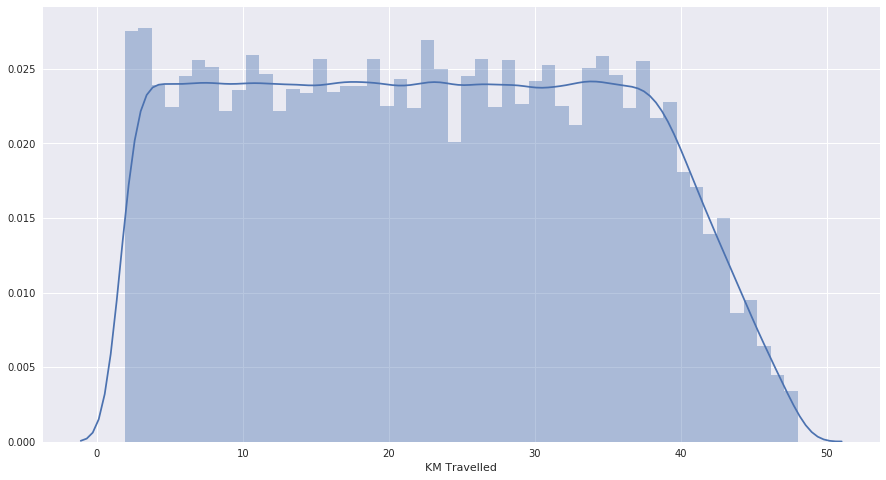

KM Travelled      1.9    1.92    1.94    1.96    1.98    2.0    2.02    2.04  \
City                                                                           
ATLANTA GA       13.3   19.20   13.58   15.68   15.84    6.0   26.26   14.28   
AUSTIN TX         7.6    3.84    7.76    7.84    5.94   10.0    6.06   12.24   
BOSTON MA        43.7   69.12   64.02   45.08   61.38   58.0   70.70   79.56   
CHICAGO IL       83.6  130.56   98.94  113.68  116.82  132.0  105.04  116.28   
DALLAS TX        19.0    9.60    5.82   19.60    9.90   10.0    8.08   20.40   
DENVER CO         7.6    0.00    1.94   13.72    5.94    6.0    4.04   14.28   
LOS ANGELES CA   96.9   96.00   75.66  113.68   99.00  106.0   90.90  110.16   
MIAMI FL          3.8    9.60    7.76    9.80   11.88   12.0    6.06   12.24   
NASHVILLE TN      7.6    1.92    5.82    9.80    5.94    4.0    0.00    2.04   
NEW YORK NY     197.6  195.84  205.64  188.16  237.60  200.0  191.90  175.44   
ORANGE COUNTY     3.8    5.76    9.70   

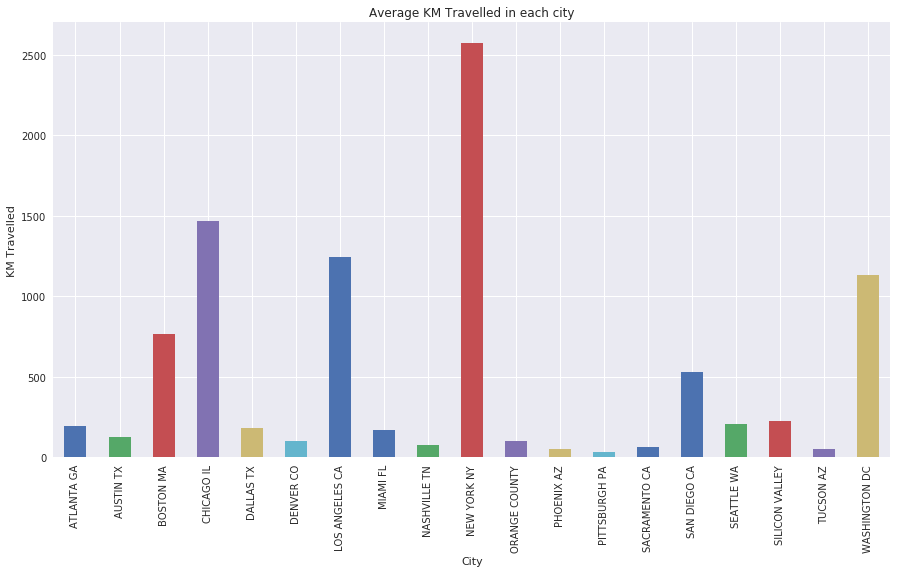

count      19.000000
mean      488.407237
std       674.052984
min        33.988284
25%        88.211951
50%       180.528661
75%       646.963312
max      2573.008856
Name: mean, dtype: float64

In [219]:
#KM travelled
sns.distplot(data['KM Travelled'])
plt.show()
data['KM Travelled'].describe()

#KM Travelled in each city
KMperCity=pd.crosstab(data['City'],data['KM Travelled'])



#Multiply all columns with their column headers
cols = KMperCity.columns
KMperCity.loc[:,cols] = KMperCity.loc[:,cols].mul(cols)

#Get mean of each row
KMperCity['mean']=KMperCity.mean(axis=1)
print(KMperCity)

# Graph
sns.set(rc = {'figure.figsize':(15,8)})
KMperCity['mean'].plot.bar()
plt.xlabel('City')
plt.ylabel('KM Travelled')
plt.title('Average KM Travelled in each city')
plt.show()

KMperCity['mean'].describe()


Most customers use the cabs to travel short distances, which makes sense as cabs operate within each city. 

In [63]:
data['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [64]:
data['City']=data['City'].astype("category")
data['City'].dtype

CategoricalDtype(categories=['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL',
                  'DALLAS TX', 'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL',
                  'NASHVILLE TN', 'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ',
                  'PITTSBURGH PA', 'SACRAMENTO CA', 'SAN DIEGO CA',
                  'SEATTLE WA', 'SILICON VALLEY', 'TUCSON AZ',
                  'WASHINGTON DC'],
                 ordered=False)

In [65]:
data['City'].dtype.categories

Index(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'],
      dtype='object')

In [66]:
cityNames=data['City'].dtype.categories
pink['City'].value_counts()
yellow['City'].value_counts()
print(cityNames)

Index(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'],
      dtype='object')
